In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from time import time

faces = pd.read_csv('FGNet-LOPO.csv')
x = faces.drop(["age", "ID", "Gender_0M_1F"], axis = 1)
y = faces[["age", "ID", "Gender_0M_1F"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 2)
mae = {}

In [2]:
from functools import singledispatchmethod
from typing import Generator, Tuple, Union
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

errors = []
errMean = []

class LOPOCV:

    def __init__(self) -> None:
        pass

    @singledispatchmethod
    def split(self, X, y, groups=None):
        raise Exception(
            'Both X and y must be either a numpy array or DataFrame.'
        )

    @split.register
    def _(self, X: np.ndarray, y: np.ndarray, groups=None):
        ...

    @split.register
    def _(
        self, X: pd.DataFrame, y: Union[pd.DataFrame, pd.Series], groups=None
    ) -> Generator[Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame], None, None]:
        Xy = X.join(y)

        for id in y['ID'].unique():
            split, valset = Xy[Xy['ID'] != id], Xy[Xy['ID'] == id]
            yield (
                split.loc[:, X.columns],
                valset.loc[:, X.columns],
                split.loc[:, y.columns],
                valset.loc[:, y.columns]
            )

x = faces.drop(["age", "ID", "Gender_0M_1F"], axis = 1)
y = faces[["age", "ID", "Gender_0M_1F"]]
def LOPO(model):
    for x_train, x_test, y_train, y_test in LOPOCV().split(x, y):
        y_pred = model.predict(x_test)
        errors.append(float(mean_absolute_error(y_test["age"], y_pred)))
    errMean.append(np.mean(errors))
    

In [3]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression().fit(x_train, y_train["age"])
LOPO(linReg)
score = 0
total = 0
error = 0
for index, row in x_test.iterrows():
    row = row.values.reshape(1,-1)
    age = np.round(linReg.predict(row))
    if age == y_test["age"][index]:
        score += 1
    else:
        error += abs(y_test["age"][index] - age)
    total += 1

print(score/total)
print(error/total)
linReg.score(x_test, y_test["age"])
mae['Linear Regression'] = float(error/total)

0.06467661691542288
[5.78109453]


In [4]:
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm
poly = PolynomialFeatures(degree=2)
X_current = poly.fit_transform(x_train)
X_curtest = poly.transform(x_test)
lin = skl_lm.LinearRegression().fit(X_current, y_train["age"])
lin.score(X_curtest, y_test["age"])

0.7148604723824471

In [5]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2).fit(x_train, y_train["age"])
LOPO(neigh)

score = 0
total = 0
error = 0
for index, row in x_test.iterrows():
    row = row.values.reshape(1,-1)
    age = np.round(neigh.predict(row))
    if age == y_test["age"][index]:
        score += 1
    else:
        error += abs(y_test["age"][index] - age)
    total += 1

print(score/total)
print(error/total)
mae['KNN'] = float(error/total)

0.08955223880597014
[6.27363184]


In [6]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5).fit(x_train, y_train["age"])
LOPO(tree)

score = 0
total = 0
error = 0
for index, row in x_test.iterrows():
    row = row.values.reshape(1,-1)
    age = np.round(tree.predict(row))
    if age == y_test["age"][index]:
        score += 1
    else:
        error += abs(y_test["age"][index] - age)
    total += 1

print(score/total)
print(error/total)
mae['Decision Tree'] = float(error/total)
tree.score(x_test, y_test["age"])

0.06467661691542288
[7.99004975]


0.2622825372359612

In [7]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=2).fit(x_train, y_train["age"])
LOPO(bag)

score = 0
total = 0
error = 0
for index, row in x_test.iterrows():
    row = row.values.reshape(1,-1)
    age = np.round(bag.predict(row))
    if age == y_test["age"][index]:
        score += 1
    else:
        error += abs(y_test["age"][index] - age)
    total += 1

print(score/total)
print(error/total)
mae['Bagging'] = float(error/total)
bag.score(x_test, y_test["age"])

0.06965174129353234
[7.21393035]


0.3212317094177056

In [8]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=8, random_state=2).fit(x_train, y_train["age"])
LOPO(forest)

score = 0
total = 0
error = 0
for index, row in x_test.iterrows():
    row = row.values.reshape(1,-1)
    age = np.round(forest.predict(row))
    if age == y_test["age"][index]:
        score += 1
    else:
        error += abs(y_test["age"][index] - age)
    total += 1

print(score/total)
print(error/total)
mae['Random Forest'] = float(error/total)
forest.score(x_test, y_test["age"])

0.06467661691542288
[6.66169154]


0.48669335739587294

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor(random_state=2).fit(x_train, y_train["age"])
LOPO(boost)

score = 0
total = 0
error = 0
for index, row in x_test.iterrows():
    row = row.values.reshape(1,-1)
    age = np.round(boost.predict(row))
    if age == y_test["age"][index]:
        score += 1
    else:
        error += abs(y_test["age"][index] - age)
    total += 1

print(score/total)
print(error/total)
mae['Gradient Boosting'] = float(error/total)
boost.score(x_test, y_test["age"])

0.12935323383084577
[6.22885572]


0.5509484444163304

In [10]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0).fit(x_train, y_train["age"])
LOPO(clf)

score = 0
total = 0
error = 0
for index, row in x_test.iterrows():
    row = row.values.reshape(1,-1)
    age = np.round(clf.predict(row))
    if age == y_test["age"][index]:
        score += 1
    else:
        error += abs(y_test["age"][index] - age)
    total += 1

print(score/total)
print(error/total)
mae['Ridge'] = float(error/total)
clf.score(x_test, y_test["age"])

0.06965174129353234
[5.52736318]


0.662138828136694

In [11]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
regr = make_pipeline(StandardScaler(), LinearSVR(random_state = 2, tol=1e-5))
regr.fit(x_train, y_train["age"])
LOPO(regr)
y_pred=regr.predict(x_test)
mae['SVR Linear'] = float(mean_absolute_error(y_test["age"], y_pred))

/Users/abc/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


from sklearn.decomposition import NMF
x_train = x_train.apply(abs)
model = NMF(n_components=2, init='random', random_state=2)
W = model.fit_transform(x_train, y_train["age"])
H = model.components_

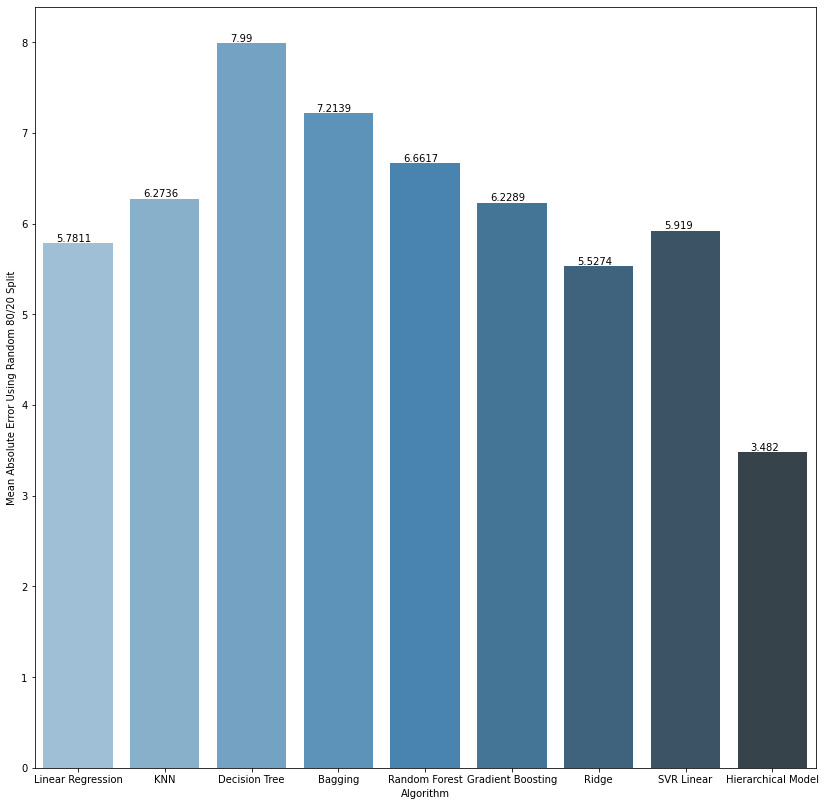

In [12]:
import seaborn as sns
mae['Hierarchical Model'] = 3.482
plt.subplots(figsize = (14,14))
ax = sns.barplot(x = list(mae.keys()), y = list(mae.values()), palette="Blues_d") 
plt.xlabel('Algorithm')
plt.ylabel('Mean Absolute Error Using Random 80/20 Split')
for index, value in enumerate(list(mae.values())):
    plt.text(index-.25, value+.02,
             str(round(value, ndigits = 4)))
    
plt.savefig('SVSM Regressor MAE')

In [13]:
print(mae.keys())

dict_keys(['Linear Regression', 'KNN', 'Decision Tree', 'Bagging', 'Random Forest', 'Gradient Boosting', 'Ridge', 'SVR Linear', 'Hierarchical Model'])


[4.8806755771800745, 4.408582344677581, 4.909612280048921, 5.218608360164389, 4.980474540827526, 4.6973302026255634, 4.7400741016527945, 4.728143528225074]


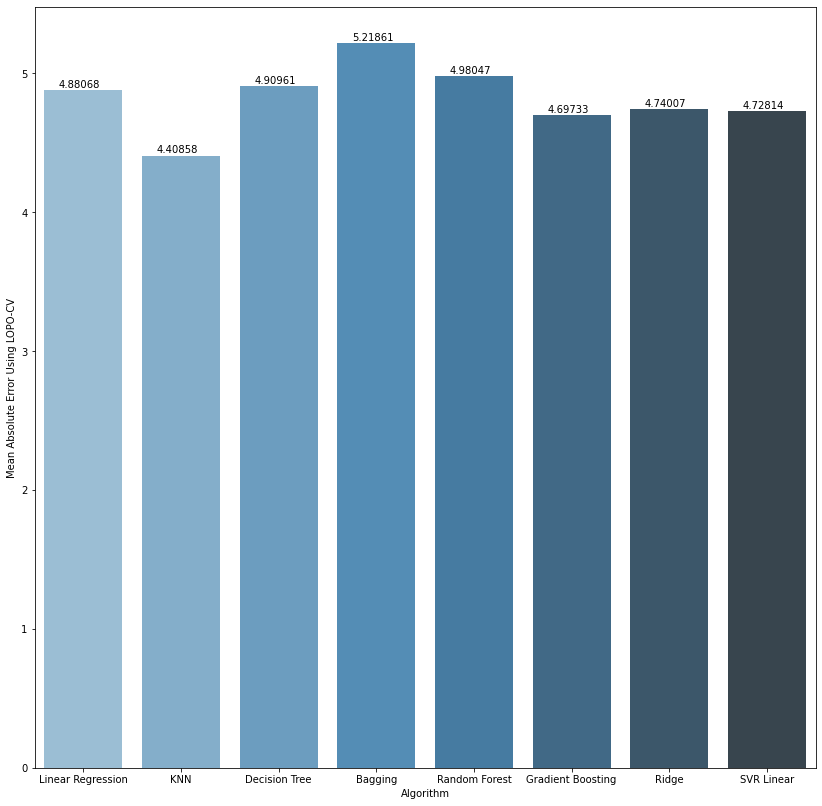

In [14]:
import seaborn as sns
plt.subplots(figsize = (14,14))
err = {}
print(errMean)
xval = ['Linear Regression', 'KNN', 'Decision Tree', 'Bagging', 'Random Forest', 'Gradient Boosting', 'Ridge', 'SVR Linear']
for index in range(8):
    err[xval[index]] = errMean[index]
ax = sns.barplot(x = list(err.keys()), y = list(err.values()), palette="Blues_d") 
plt.xlabel('Algorithm')
plt.ylabel('Mean Absolute Error Using LOPO-CV')
for index, value in enumerate(list(err.values())):
    plt.text(index-.25, value+.02,
             str(round(value, ndigits = 5)))
